## SARIMAX Model

### 1. Import libraries and get data

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pmdarima as pmd

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import statsmodels.api as sm

In [9]:
# Load the dataset
df = pd.read_csv("./BTC.csv")

# Drop the unnecessary columns.
df.drop(['Open', 'High', 'Low', 'Vol.', 'Change %'], axis=1, inplace=True)

# Convert the "Date" column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%b %d, %Y')
                                    
# Sort the DataFrame by date
df = df.sort_values('Date')

# Set Date index
df.set_index('Date', inplace=True)

df

,Price
Date,
2017-12-01,10861.5
2017-12-02,10912.7
2017-12-03,11246.2
2017-12-04,11623.9
2017-12-05,11667.1
...,...
2023-03-28,27262.2
2023-03-29,28350.4
2023-03-30,28029.5


### 2. Split the data into training, test and validate sets

In [10]:
train_size = int(0.7 * len(df))
test_size = int(0.15 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1363, 1)
Test shape: (292, 1)
Validate shape: (293, 1)


In [11]:
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1168, 1)
Test shape: (389, 1)
Validate shape: (391, 1)


In [12]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1363, 1)
Test shape: (389, 1)
Validate shape: (196, 1)


## 3. Perform SARIMAX Model

Exogenous variable

In [13]:
train_data['seasonal_index'] = train_data.index.day

C:\Users\PHUTRAN\AppData\Local\Temp\ipykernel_30212\586218167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['seasonal_index'] = train_data.index.day


### 3.1 Build the best SARIMAX Model from auto_arima

In [14]:
# SARIMAX Model
import pmdarima as pmd

SARIMAX_model = pmd.auto_arima(train_data[['Price']], 
                        exogenous=train_data[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

SARIMAX_model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=6.40 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=25700.352, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=22723.504, Time=4.36 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=24552.697, Time=3.12 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=25709.580, Time=0.07 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=23277.505, Time=0.56 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=22627.473, Time=13.30 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=18.50 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=6.53 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=25680.216, Time=4.05 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=22625.702, Time=15.22 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=22724.372, Time=5.56 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=21.16 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=7.22 sec
 ARIMA(3,0,0)(2,1,0)[12] interc

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1363
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 12)   Log Likelihood              -11305.200
Date:                            Mon, 12 Jun 2023   AIC                          22622.401
Time:                                    22:57:42   BIC                          22653.653
Sample:                                12-01-2017   HQIC                         22634.104
                                     - 08-24-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9116      0.017     53.592      0.000       0.878       0.945
ar.L2          0.0998      0.022      4.519      0.000       0.056       0.143
ar.L3         -0.0503      0.015     -3.462      0.001      -0.079      -0.022
ar.S.L12      -0.7629      0.014    -55.920      0.000      -0.790      -0.736
ar.S.L24      -0.2763      0.015    -18.930      0.000      -0.305      -0.248
sigma2      1.072e+06   1.56e+04     68.583      0.000    1.04e+06     1.1e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10200.98
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               7.52   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### 3.2 Evaluate on Validate data

In [37]:
def evaluate_sarimax_model(y_data):
    predictions = (SARIMAX_model.predict(n_periods=len(y_data))).values
    mse = mean_squared_error(y_data, predictions)
    mae = mean_absolute_error(y_data, predictions)
    mape = mean_absolute_percentage_error(y_data, predictions)
    rmse = mean_squared_error(y_data, predictions, squared=False)
    return predictions, mse, mae, mape, rmse

In [38]:
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data)
y_pred_val, val_mse, val_mae, val_mape, val_rmse = evaluate_sarimax_model(y_val)

print("Price predict on validate data:", y_pred_val)

Price predict on validate data: [47095.23726167 46874.11835053 46092.33901451 46705.09626376
 46726.87433611 47836.10612058 49465.16573053 50026.80768883
 51046.19140875 50569.87702704 51010.85225631 49621.65425015
 50465.28569669 49666.8587717  48962.60233245 48886.78828239
 48395.60452815 49040.03812311 50757.16321226 51758.81486232
 52322.61430701 52060.76291135 52159.11312584 50489.42960479
 51202.60938353 50583.22554257 49894.20122223 49787.34619122
 49213.24340453 49811.13860338 51472.91763301 52597.61037783
 53011.60118429 52734.05438955 52965.88153664 51308.21803941
 51638.32668823 50966.54602579 50172.11504241 50209.63365301
 49773.67812778 50471.26906819 52089.22553227 52939.1843763
 53536.33757378 53156.74761489 53328.78191048 51688.86759856
 52298.65067112 51570.67410643 50807.56711457 50700.39651453
 50140.51791444 50735.08575953 52363.49254791 53352.26589994
 53815.73742638 53484.36684705 53632.50176472 51944.3636335
 52416.48794785 51716.89551996 50931.18256545 50867.758

### 3.3 Evaluate on Test data

In [39]:
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data)
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_sarimax_model(y_test)

print("Price predict on test data:", y_pred_test)

Price predict on test data: [47095.23726167 46874.11835053 46092.33901451 46705.09626376
 46726.87433611 47836.10612058 49465.16573053 50026.80768883
 51046.19140875 50569.87702704 51010.85225631 49621.65425015
 50465.28569669 49666.8587717  48962.60233245 48886.78828239
 48395.60452815 49040.03812311 50757.16321226 51758.81486232
 52322.61430701 52060.76291135 52159.11312584 50489.42960479
 51202.60938353 50583.22554257 49894.20122223 49787.34619122
 49213.24340453 49811.13860338 51472.91763301 52597.61037783
 53011.60118429 52734.05438955 52965.88153664 51308.21803941
 51638.32668823 50966.54602579 50172.11504241 50209.63365301
 49773.67812778 50471.26906819 52089.22553227 52939.1843763
 53536.33757378 53156.74761489 53328.78191048 51688.86759856
 52298.65067112 51570.67410643 50807.56711457 50700.39651453
 50140.51791444 50735.08575953 52363.49254791 53352.26589994
 53815.73742638 53484.36684705 53632.50176472 51944.3636335
 52416.48794785 51716.89551996 50931.18256545 50867.7582875

### 3.4 Predict price for the next 30 days

In [40]:
last_index = len(df)
date_range = pd.date_range(start=df.index[-1], periods=30, freq='D')

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = (SARIMAX_model.predict(n_periods=len(x_next_30_days))).values

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[47095.23726167 46874.11835053 46092.33901451 46705.09626376
 46726.87433611 47836.10612058 49465.16573053 50026.80768883
 51046.19140875 50569.87702704 51010.85225631 49621.65425015
 50465.28569669 49666.8587717  48962.60233245 48886.78828239
 48395.60452815 49040.03812311 50757.16321226 51758.81486232
 52322.61430701 52060.76291135 52159.11312584 50489.42960479
 51202.60938353 50583.22554257 49894.20122223 49787.34619122
 49213.24340453 49811.13860338]


### 4.  Evaluate accuracy validate, test data

In [45]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

df = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(df)


                   MSE           MAE      MAPE          RMSE
Validate  1.009086e+09  31570.274050  1.612253  31766.115346
Test      3.519700e+08  15509.790536  0.563908  18760.862695


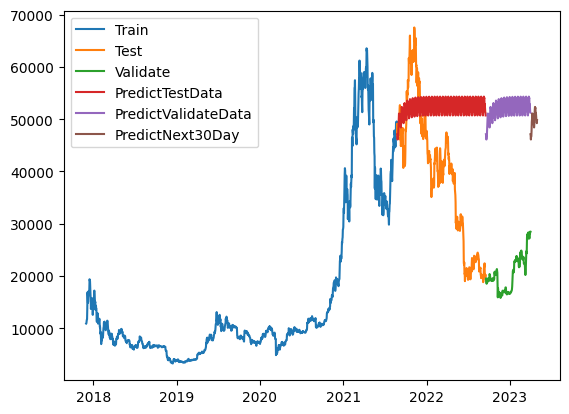

In [46]:
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(val_data.index, val_data['Price'])

plt.plot(test_data.index, y_pred_test)
plt.plot(val_data.index, y_pred_val)
plt.plot(date_range, y_next_30_days)

plt.legend(['Train', 'Test', 'Validate','PredictTestData', 'PredictValidateData','PredictNext30Day'])
plt.show()